In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd 
from sklearn.model_selection import train_test_split

%matplotlib notebook 



# Linear regression example, generating data and fitting a model 

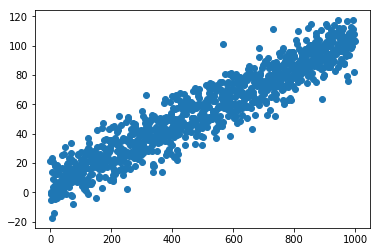

In [2]:
np.random.seed(1)
x = np.arange(0,1000)
noise = np.random.normal(0,10,1000)
slope = 0.1
b = 5.0 

y = (slope*x)+b 
y_noised =  y+noise
plt.figure()
plt.scatter(x,y_noised)
plt.show()


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y_noised, test_size=0.2, random_state=1)

In [4]:
x_train_shape = x_train.shape[0]
y_train_shape = y_train.shape[0]

x_train_reshaped = x_train.reshape(x_train_shape, 1)
y_train_reshaped = y_train.reshape(y_train_shape, 1)


x_test_shape = x_test.shape[0]
x_test_reshaped = x_test.reshape(x_test_shape, 1)


In [5]:
# fitting the model in sklearn 

lr = LinearRegression()
lr.fit(x_train_reshaped, y_train_reshaped)

pred_slope = lr.coef_
pred_b = lr.intercept_




ValueError: Found input variables with inconsistent numbers of samples: [800, 200]

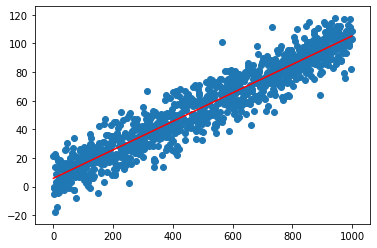

In [7]:
# fitting the model line to the data 
model_line = (pred_slope*x)+pred_b
model_line_reshaped = model_line.reshape(model_line.shape[1])
plt.figure()
plt.plot(x, model_line_reshaped, color="red")
plt.scatter(x, y_noised)


In [8]:
# generate mean squared error and plot it 
y_pred= lr.predict(x_test_reshaped)

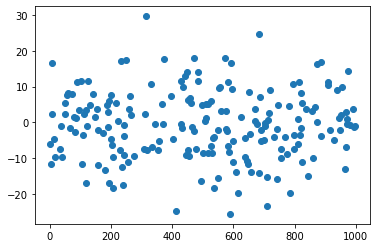

(91.31859463754672, 0.8986044477203021)

In [9]:
residuals = y_test - y_pred.reshape(y_pred.shape[0],)
plt.figure()
plt.scatter(x_test,residuals)
plt.show()

mean_squared_error(y_test,  y_pred.reshape(y_pred.shape[0],)), r2_score(y_test,  y_pred.reshape(y_pred.shape[0],))

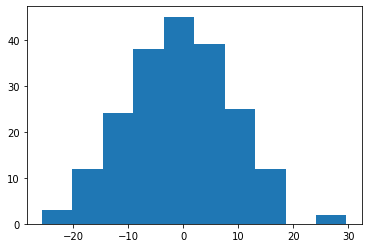

In [10]:
plt.figure()
plt.hist(residuals)
plt.show()



# Generating polynomial curves and polynomial fitting


## Generating sine data


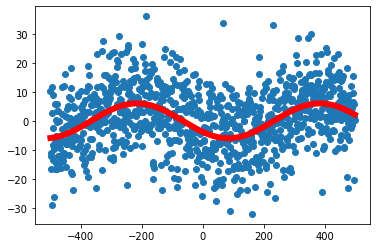

In [43]:
# sine data 
wavelength = 600
amplitude = 6
phase= 2.45
y_sine = amplitude*np.sin(((2*np.pi*x)/wavelength)-phase)
y_sine_noised = y_sine + noise

# plot sine curve with noise
plt.figure()
plt.scatter(x, y_sine_noised)
plt.plot(x,y_sine, color='red', linewidth=6)

# generating sine wave and adding noise to it. The red line is NOT a fit, its the source curve. 

# 2 datasets 1 for amplitude of 6 and another for amplitude of 3 and phase 2.45




In [38]:
poly = PolynomialFeatures(5)
poly_features= poly.fit_transform(x.reshape(x.shape[0],1))


In [39]:
lr_poly = LinearRegression()
lr_poly.fit(poly_features, y_sine_noised)
predicted_values = lr_poly.predict(poly_features)


In [40]:
poly_nominal_coeffs = lr_poly.coef_
y_pred =np.sum(poly_features*poly_nominal_coeffs, axis=1)

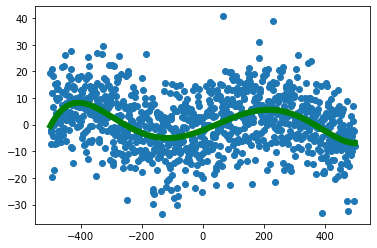

In [41]:
# plot sine curve with noise model
plt.figure()
plt.scatter(x, y_sine_noised)
plt.plot(x,predicted_values, color='green', linewidth=6)

## Generating parabolic data


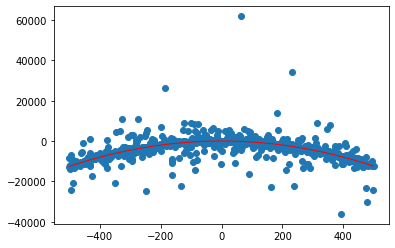

In [47]:
x = np.arange(-500,500)

y_parabolic =  (0.1*x)-(0.05*x**2)+3

y_par_noised = y_parabolic+ (noise**3)
plt.figure()
plt.scatter(x, y_par_noised)
plt.plot(x,y_parabolic, color='red', linewidth=1)


(16714819.933814391, 0.4621784677863441)

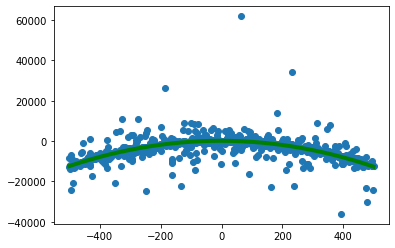

In [48]:
poly = PolynomialFeatures(2)
poly_features= poly.fit_transform(x.reshape(x.shape[0],1))

lr_poly = LinearRegression()
lr_poly.fit(poly_features, y_par_noised)
predicted_values = lr_poly.predict(poly_features)

# plot sine curve with noise model
plt.figure()
plt.scatter(x, y_par_noised)
plt.plot(x,predicted_values, color='green', linewidth=4)
mean_squared_error(y_par_noised, predicted_values), r2_score(y_par_noised, predicted_values)

# Boston housing dataset polynomial regression 


In [18]:
boston_dataset = load_boston()
target = boston_dataset.target
data = boston_dataset.data

(506,)

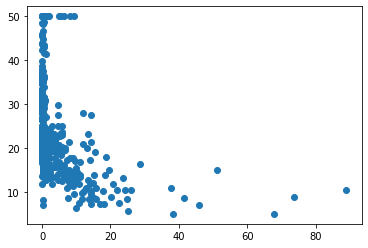

In [61]:
crime_rate = data[:,0] # for first column which is crime rate and 5 th column, please look up

plt.figure()
plt.scatter(crime_rate, target)
crime_rate.shape

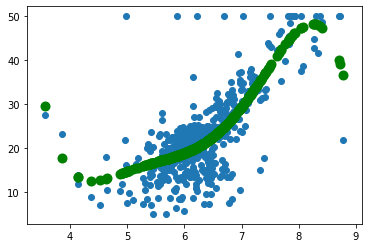

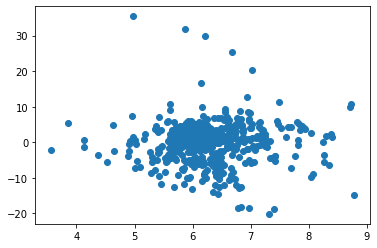

(34.56509736959911, 0.5905558031404711)

In [58]:
poly = PolynomialFeatures(6)
poly_features= poly.fit_transform(crime_rate.reshape(crime_rate.shape[0],1))
# poly_features = poly.fit_transform(crime_rate)
lr_poly = LinearRegression()
lr_poly.fit(poly_features, target)
predicted_values = lr_poly.predict(poly_features)

# plot crime rate with target and model
plt.figure()
plt.scatter(crime_rate, target)
plt.scatter(crime_rate, predicted_values, color='green', linewidth=4)

# residual plot
residuals = target-predicted_values
plt.figure()
plt.scatter(crime_rate, residuals)
plt.show()

mean_squared_error(target, predicted_values), r2_score(target, predicted_values)

# Shampoo sales dataset


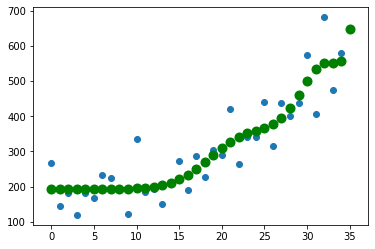

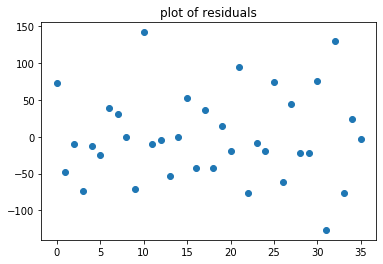

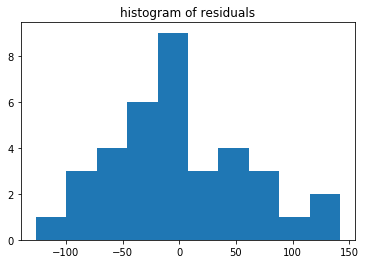

In [21]:
shampoo = pd.read_csv("shampoo_sales.csv")
x_values = np.arange(0,shampoo.shape[0])
sales = shampoo["Sales"].values

poly = PolynomialFeatures(17)
poly_features= poly.fit_transform(x_values.reshape(x_values.shape[0],1))

lr_poly = LinearRegression()
lr_poly.fit(poly_features, sales)
predicted_values = lr_poly.predict(poly_features)

# plot shampoo data with model
plt.figure()
plt.title("")
plt.scatter(x_values, sales )
plt.scatter(x_values, predicted_values, color='green', linewidth=4)

# residual plot
residuals = sales-predicted_values
plt.figure()
plt.title("plot of residuals")
plt.scatter(x_values, residuals)
plt.show()

# histogram of residuals 
plt.figure()
plt.hist(residuals)
plt.title("histogram of residuals")
plt.show()

In [22]:
mean_squared_error(sales, predicted_values), r2_score(sales, predicted_values)

(3483.3054219786222, 0.8384824004283284)